#### Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. *
* About
50 000 USD per year is about 4 167 USD monthly.
##### SOURCE:
- http://archive.ics.uci.edu/ml/datasets/Adult
- https://www.kaggle.com/overload10/adult-census-dataset/tasks
- http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

##### Importing Libraries

# 1. Data Ingestion

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import RandomizedSearchCV
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df = pd.read_csv('adult_data.txt',header = None,names = heading)
df.info();display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2. Exploratory Data Analysis (EDA)

In [3]:
df.shape

(32561, 15)

#### The number of missing data points per column

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

###### No missing values found

#### Data Analysis and Cleaning

##### How many people in dataset have income >50K or <=50K

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: ylabel='count'>

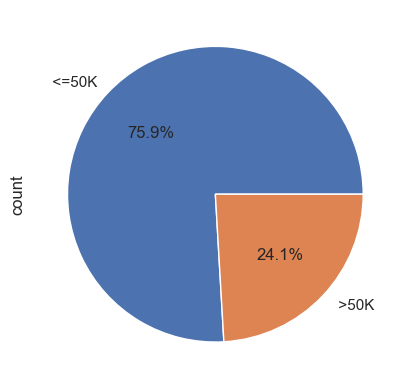

In [5]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

###### More people earn less or equal 5OK $.

#### Summary Statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


- There's no missing data as all counts are same.
- There is presence of outliers in the dataset in various columns.
- There data has skewness too.

In [7]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
num_columns = [col for col in df.columns if df[col].dtypes!='O']
cat_columns = [col for col in df.columns if df[col].dtypes=='O']

In [9]:
df[num_columns]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [10]:
df[cat_columns]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [11]:
for i in df[cat_columns].columns:
    print(i,"Unique Values",df[i].unique())
    print('\n')

workclass Unique Values [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


education Unique Values [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


marital-status Unique Values [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation Unique Values [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


relationship Unique Values [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


race Unique Values [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' 

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

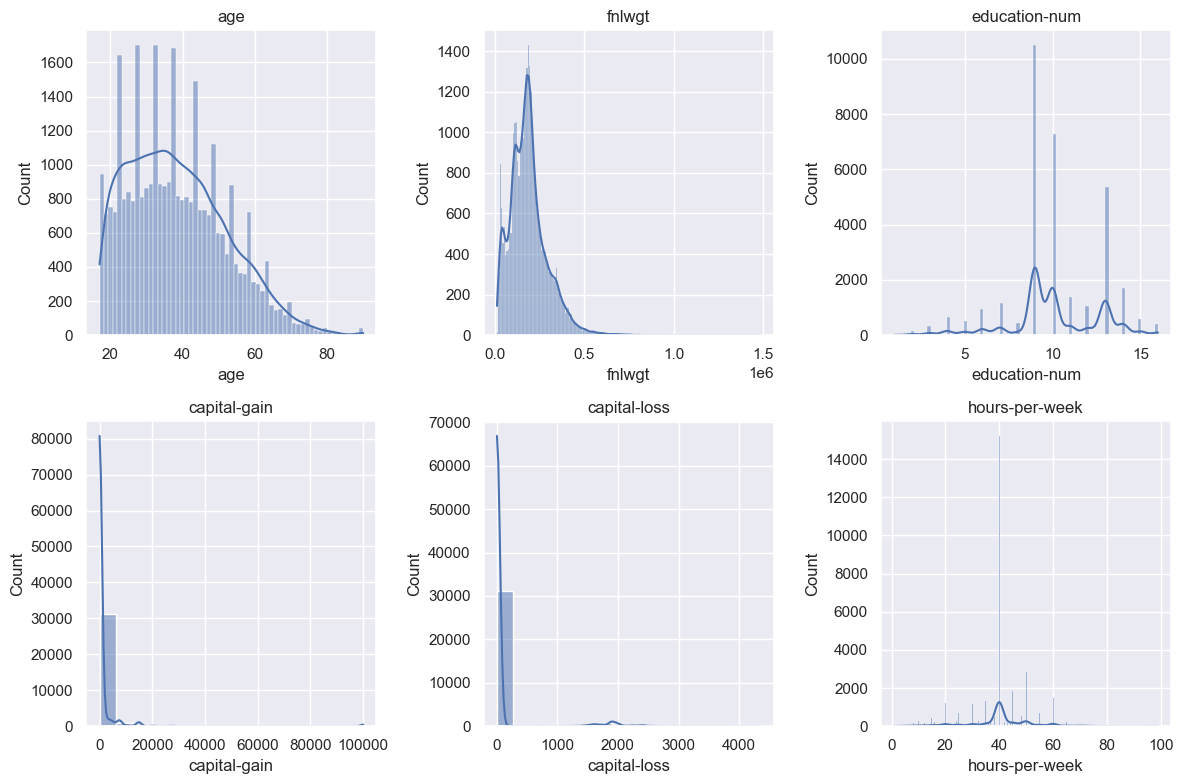

In [13]:
# Visualize numerical features
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
#plt.savefig('numerical_features.png')
#plt.close()

In [14]:
for col in df.columns:
    if df[df[col].astype(str) == ' ?'].count()[1] > 0:
        print(f'{col} contains: {df[df[col].astype(str) == ' ?'].count()[1]} ? values')

workclass contains: 1836 ? values
occupation contains: 1843 ? values
native-country contains: 583 ? values


### Visualizing each column to make fill in the correct values.

<Axes: xlabel='workclass', ylabel='Count'>

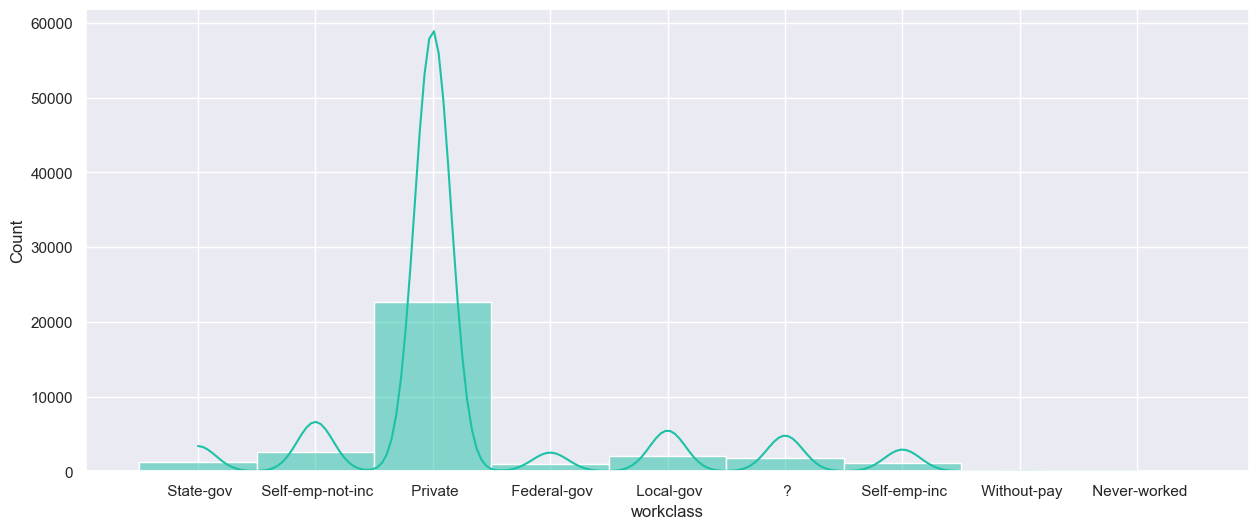

In [15]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x=df['workclass'], element="bars",kde=True, color="#1dc2a6")

The dominant values are only of Private Sector.
? does not have signifacnt values or contribution ot the dataset.

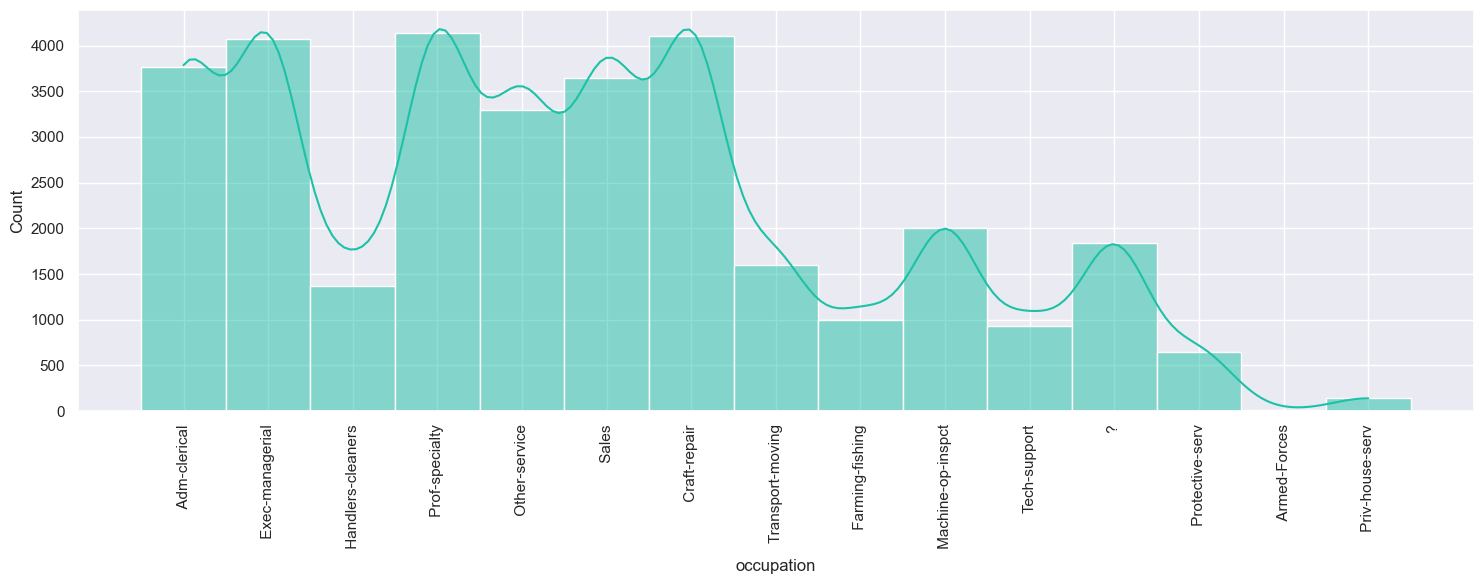

In [16]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x=df['occupation'], element="bars",kde=True, color="#1dc2a6")
plt.xticks(rotation=90)
plt.tight_layout()

The dominant values are only of United-States.
? does not have signifacnt values or contribution ot the dataset.

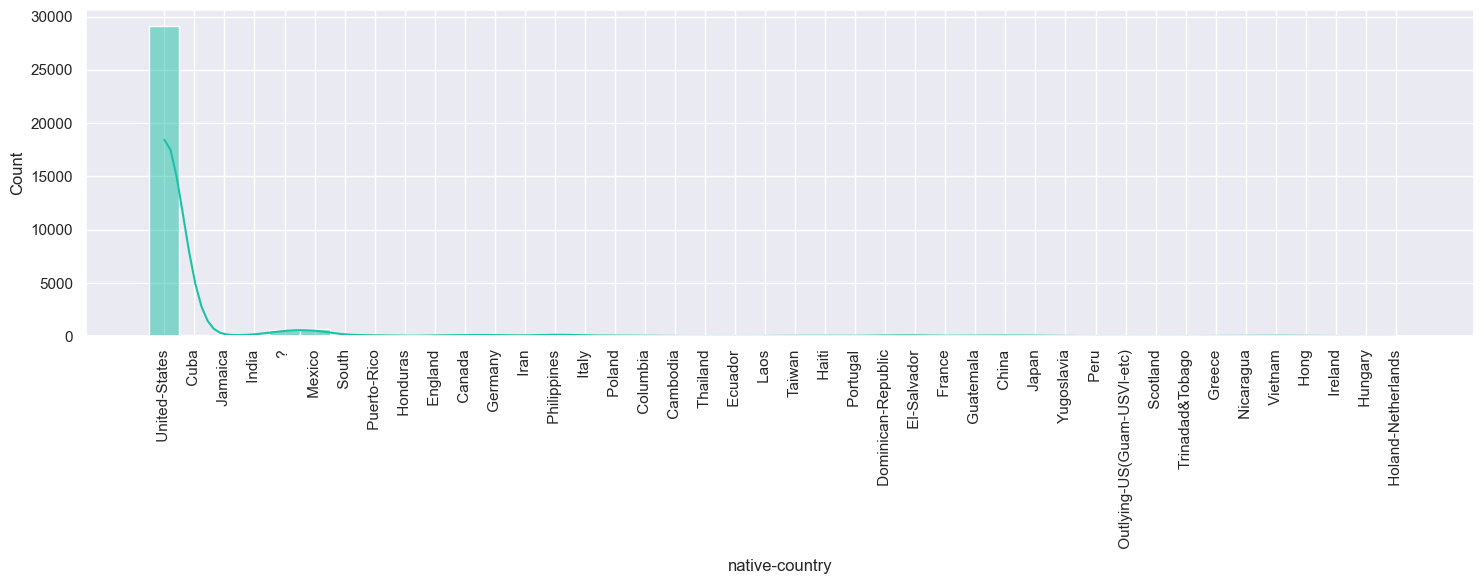

In [17]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x=df['native-country'], element="bars",kde=True, color="#1dc2a6")
plt.xticks(rotation=90)
plt.tight_layout()

All the sectors have significant values therefore we need to disrtibute the ? values.

Replacing the ? values with the mode of the column.

# 3. Preprocessing

In [18]:

# Replace '?' with NaN
df = df.replace(' ?', np.nan)

# Handle missing values
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

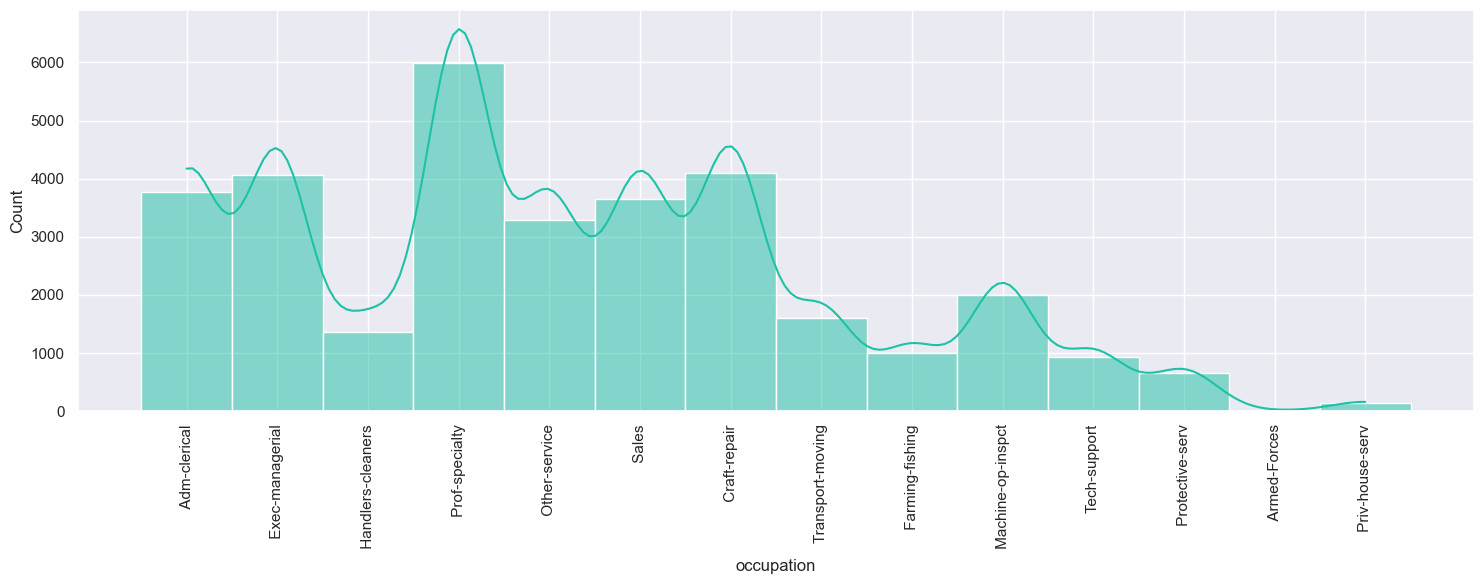

In [19]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x=df['occupation'], element="bars",kde=True, color="#1dc2a6")
plt.xticks(rotation=90)
plt.tight_layout()

In [20]:
for col in df.columns:
    if df[df[col].astype(str) == ' ?'].count()[1] > 0:
        print(f'{col} contains: {df[df[col].astype(str) == ' ?'].count()[1]} ? values')

The issue has been resolved and we get the clean dataset without any missing values.

In [21]:
# Encode categorical variables
categorical_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [22]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [23]:
# Encode target variable
df['income'] = df['income'].map({' <=50K':0,' >50K':1})

In [24]:
## Split features and target
X = df.drop('income',axis=1)
y = df['income']

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training with Hyperparameter Tuning

####  Logistic Regression

In [27]:
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

In [28]:
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='roc_auc')
lr_grid.fit(X_train_scaled, y_train)
lr_best = lr_grid.best_estimator_
print("\nBest Logistic Regression Parameters:", lr_grid.best_params_)
print("Best Logistic Regression ROC AUC:", lr_grid.best_score_)


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression ROC AUC: 0.8540027423832017


####  SVM with kernel

In [33]:
# parameter grid with a range of values to test
svm_params = {
    'C': [1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01]
}

In [41]:
# Subset data for tuning
X_subset, _, y_subset, _ = train_test_split(
    X_train_scaled, y_train, train_size=0.4, stratify=y_train, random_state=42)

# Define parameter grid
svm_params = {
    'C': [1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 0.01]
}

# Randomized search
svm_random = RandomizedSearchCV(
    SVC(probability=True, class_weight='balanced'),
    svm_params,
    n_iter=12,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
svm_random.fit(X_subset, y_subset)

# Train best model on full data
svm_best = svm_random.best_estimator_
svm_best.fit(X_train_scaled, y_train)

print("\nBest SVM Parameters:", svm_random.best_params_)
print("Best SVM ROC AUC:", svm_random.best_score_)


Best SVM Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Best SVM ROC AUC: 0.896102513670324


#### 5. Model Evaluation

In [44]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    #plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    #plt.close()

In [45]:
# Function to plot ROC curve
def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    # plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    # plt.close()


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4942
           1       0.72      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



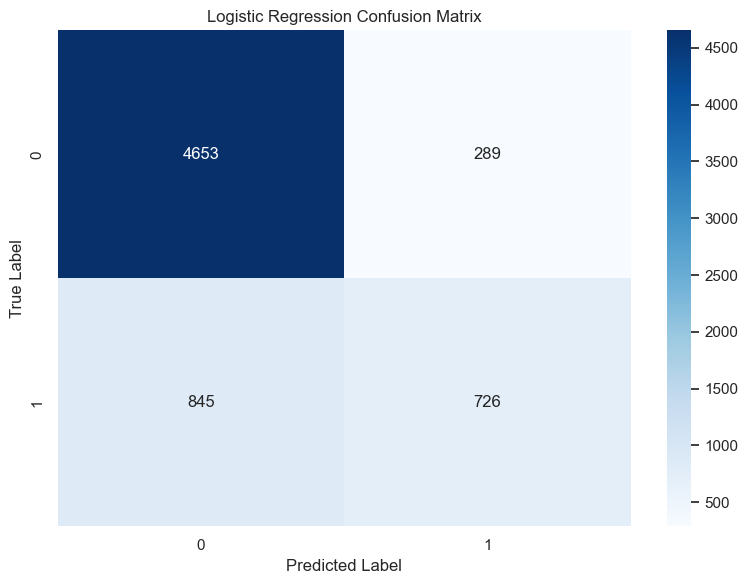

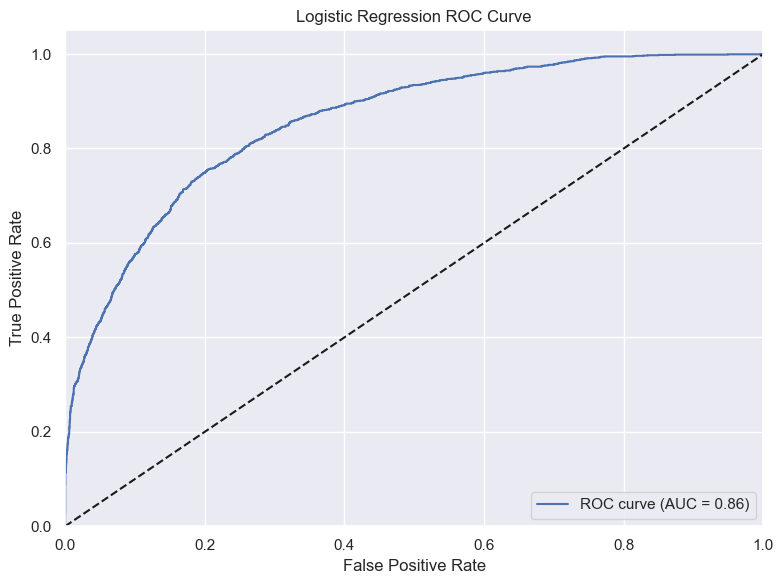

In [46]:
# Evaluate Logistic Regression
lr_pred = lr_best.predict(X_test_scaled)
lr_prob = lr_best.predict_proba(X_test_scaled)[:, 1]
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
plot_confusion_matrix(y_test, lr_pred, "Logistic Regression Confusion Matrix")
plot_roc_curve(y_test, lr_prob, "Logistic Regression ROC Curve")


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      4942
           1       0.55      0.87      0.68      1571

    accuracy                           0.80      6513
   macro avg       0.75      0.82      0.77      6513
weighted avg       0.85      0.80      0.81      6513



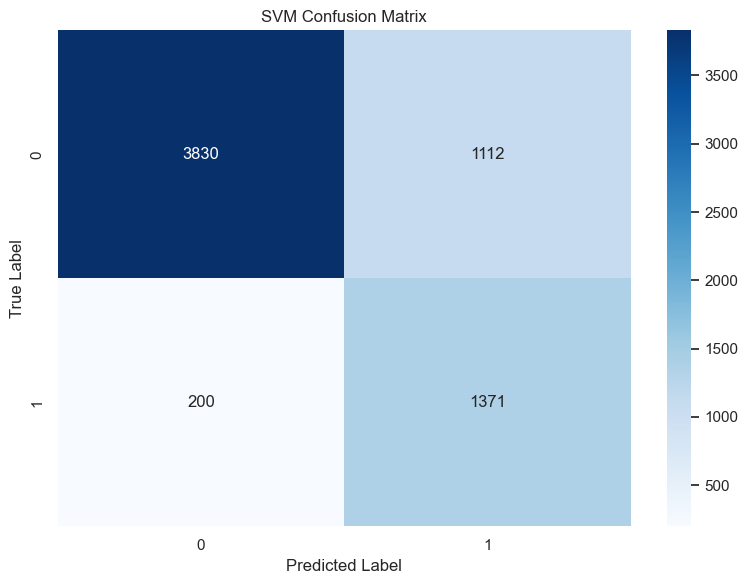

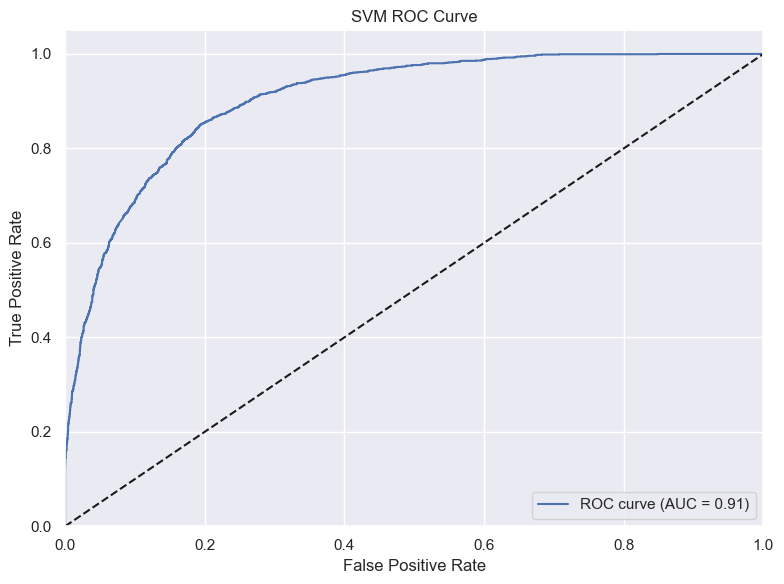

In [47]:
# Evaluate SVM
svm_pred = svm_best.predict(X_test_scaled)
svm_prob = svm_best.predict_proba(X_test_scaled)[:, 1]
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))
plot_confusion_matrix(y_test, svm_pred, "SVM Confusion Matrix")
plot_roc_curve(y_test, svm_prob, "SVM ROC Curve")

In [48]:
# Save comparison of ROC AUC scores
results = {
    'Model': ['Logistic Regression', 'SVM'],
    'ROC AUC Score': [roc_auc_score(y_test, lr_prob), roc_auc_score(y_test, svm_prob)]
}
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)


Model Comparison:
                  Model  ROC AUC Score
0  Logistic Regression       0.856525
1                  SVM       0.905979


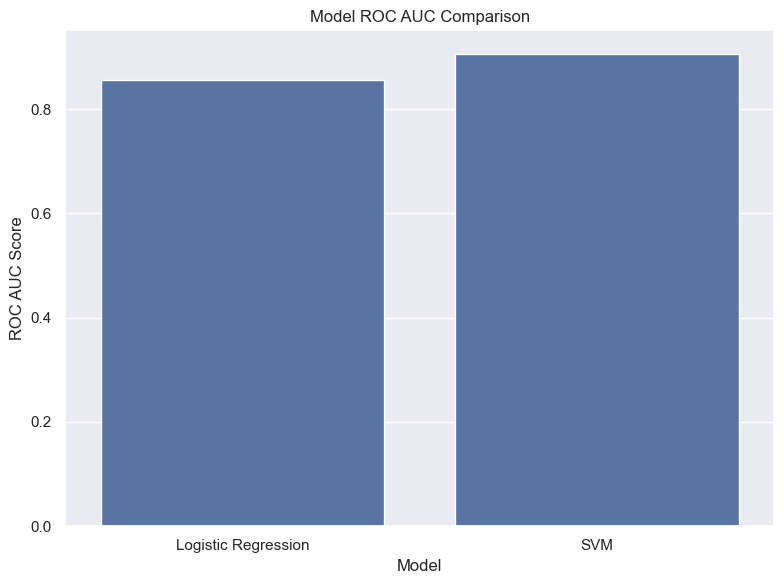

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='ROC AUC Score', data=results_df)
plt.title('Model ROC AUC Comparison')
plt.tight_layout()